### Algerian Forest Fires Dataset

The dataset includes 244 instances that regroup a data of two regions of Algeria, namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attributes and 1 output attribute (class)
The 244 instances have been classified into fire (138 classes) and not fire (106 classes) classes.

DC: Drought Code index   [7 to 220.4]

DMC: Duff Moisture Code [1.1 to 65.9]

FFMC: Fine Fuel Moisture Code [28.6 to 92.5]

Rain: [0 to 16.8] mm

Ws: Windspeed in km/h [6 to 29]

RH: Relative Humidity [21 to 90]

Temperature: [22 to 45] C

year: 2012

ISI: Initial Spread Index from FWI system [0 to 18.5]

BUI: Buildup Index [1.1 to 68]

FWI: Fire Weather Index [0 to 31.1]

Classes: Fire/Not-Fire



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(r'C:\Users\Nitin Flavier\Desktop\Data Nexus\Data Science\ML_BootCamp\ML_Algos\Linear_Regression\Datasets\Algerian_forest_fires_dataset.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [3]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [4]:
index_list = [122,123,124,168]
df.drop(index_list,axis=0,inplace=True)

In [5]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [6]:
# combined both region datasets and label it as 0,1

df.loc[:122,"Region"] = 0
df.loc[122:,"Region"] = 1

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    object 
 1   month        243 non-null    object 
 2   year         243 non-null    object 
 3   Temperature  243 non-null    object 
 4    RH          243 non-null    object 
 5    Ws          243 non-null    object 
 6   Rain         243 non-null    object 
 7   FFMC         243 non-null    object 
 8   DMC          243 non-null    object 
 9   DC           243 non-null    object 
 10  ISI          243 non-null    object 
 11  BUI          243 non-null    object 
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(1), object(14)
memory usage: 38.5+ KB


In [8]:
df['Region'] = df['Region'].astype(int)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4    RH          243 non-null    object
 5    Ws          243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 37.5+ KB


In [10]:
df.iloc[120:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0
125,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1
126,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1
127,3,6,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1


In [11]:
df = df.reset_index(drop=True) # if not True then the old index will be added as a new column

In [12]:
df[120:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1
123,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1
124,3,6,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1


In [13]:
# We have extra space in columns here
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [14]:
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [15]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [16]:
df[['day','month','year','Temperature','RH','Ws']] = df[['day','month','year','Temperature','RH','Ws']].astype(int)
df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']] = df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']].astype(float)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [18]:
[feature for feature in df.columns if df[feature].dtypes == 'O']

['Classes']

In [19]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [20]:
df['Classes'] = df['Classes'].str.strip()
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [21]:
# Lets Save the cleaned dataset
df.to_csv('Algerian_forest_fires_cleaned_dataset.csv',index=False)

### EDA 

In [22]:
df_copy = df.drop(['day','month','year'],axis=1)

In [23]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [24]:
# encoding the categorical feature Classes

df_copy['Classes'] = np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [25]:
df['Classes'].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

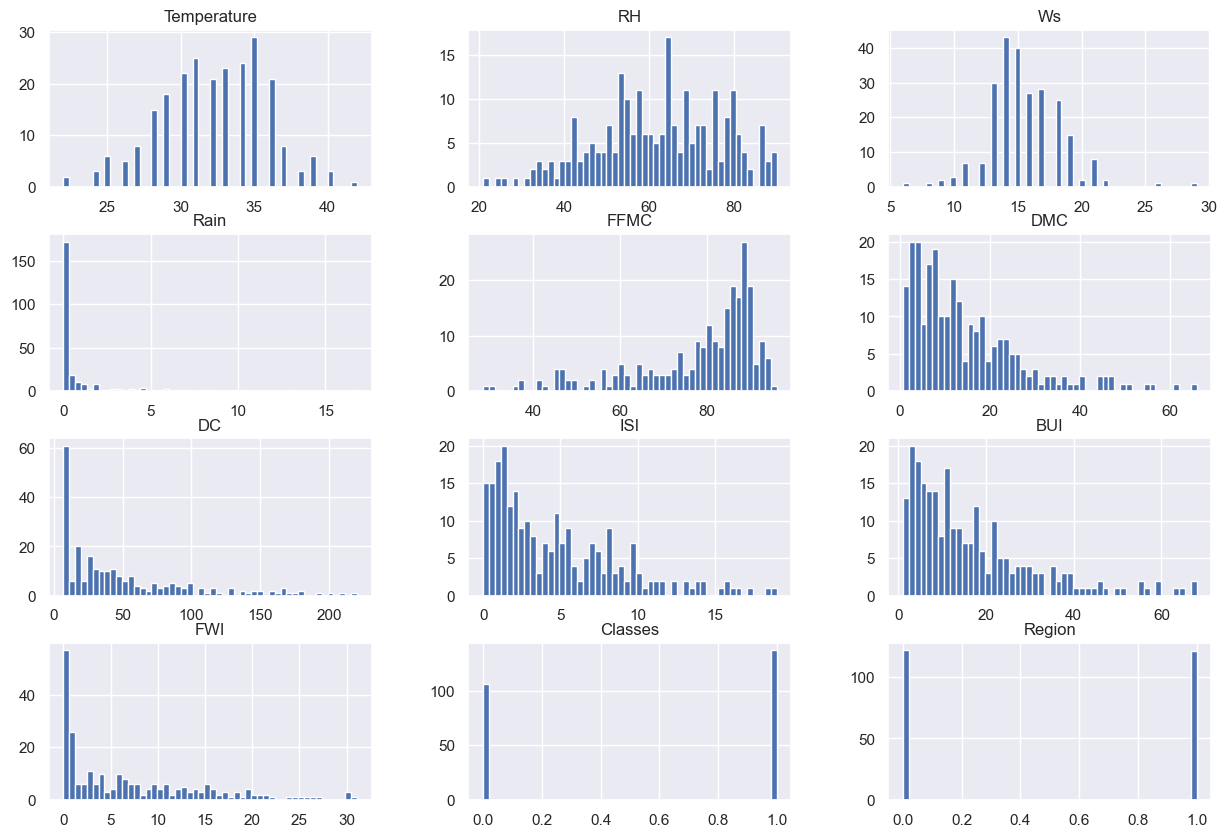

In [26]:
# Draw the Density Plot
import seaborn as sns

sns.set_theme(style='darkgrid')
df_copy.hist(bins=50,figsize=(15,10)) 
plt.show()

C:\Users\Nitin Flavier\AppData\Local\Temp\ipykernel_17088\3105945706.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df_copy[df_copy.columns[i]],shade=True,color='g')
C:\Users\Nitin Flavier\AppData\Local\Temp\ipykernel_17088\3105945706.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df_copy[df_copy.columns[i]],shade=True,color='g')
C:\Users\Nitin Flavier\AppData\Local\Temp\ipykernel_17088\3105945706.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df_copy[df_copy.columns[i]],shade=True,color='g')
C:\Users\Nitin Flavier\AppData\Local\Temp\ipykernel_17088\3105945706.py:6: FutureWarning: 

`shade` is now de

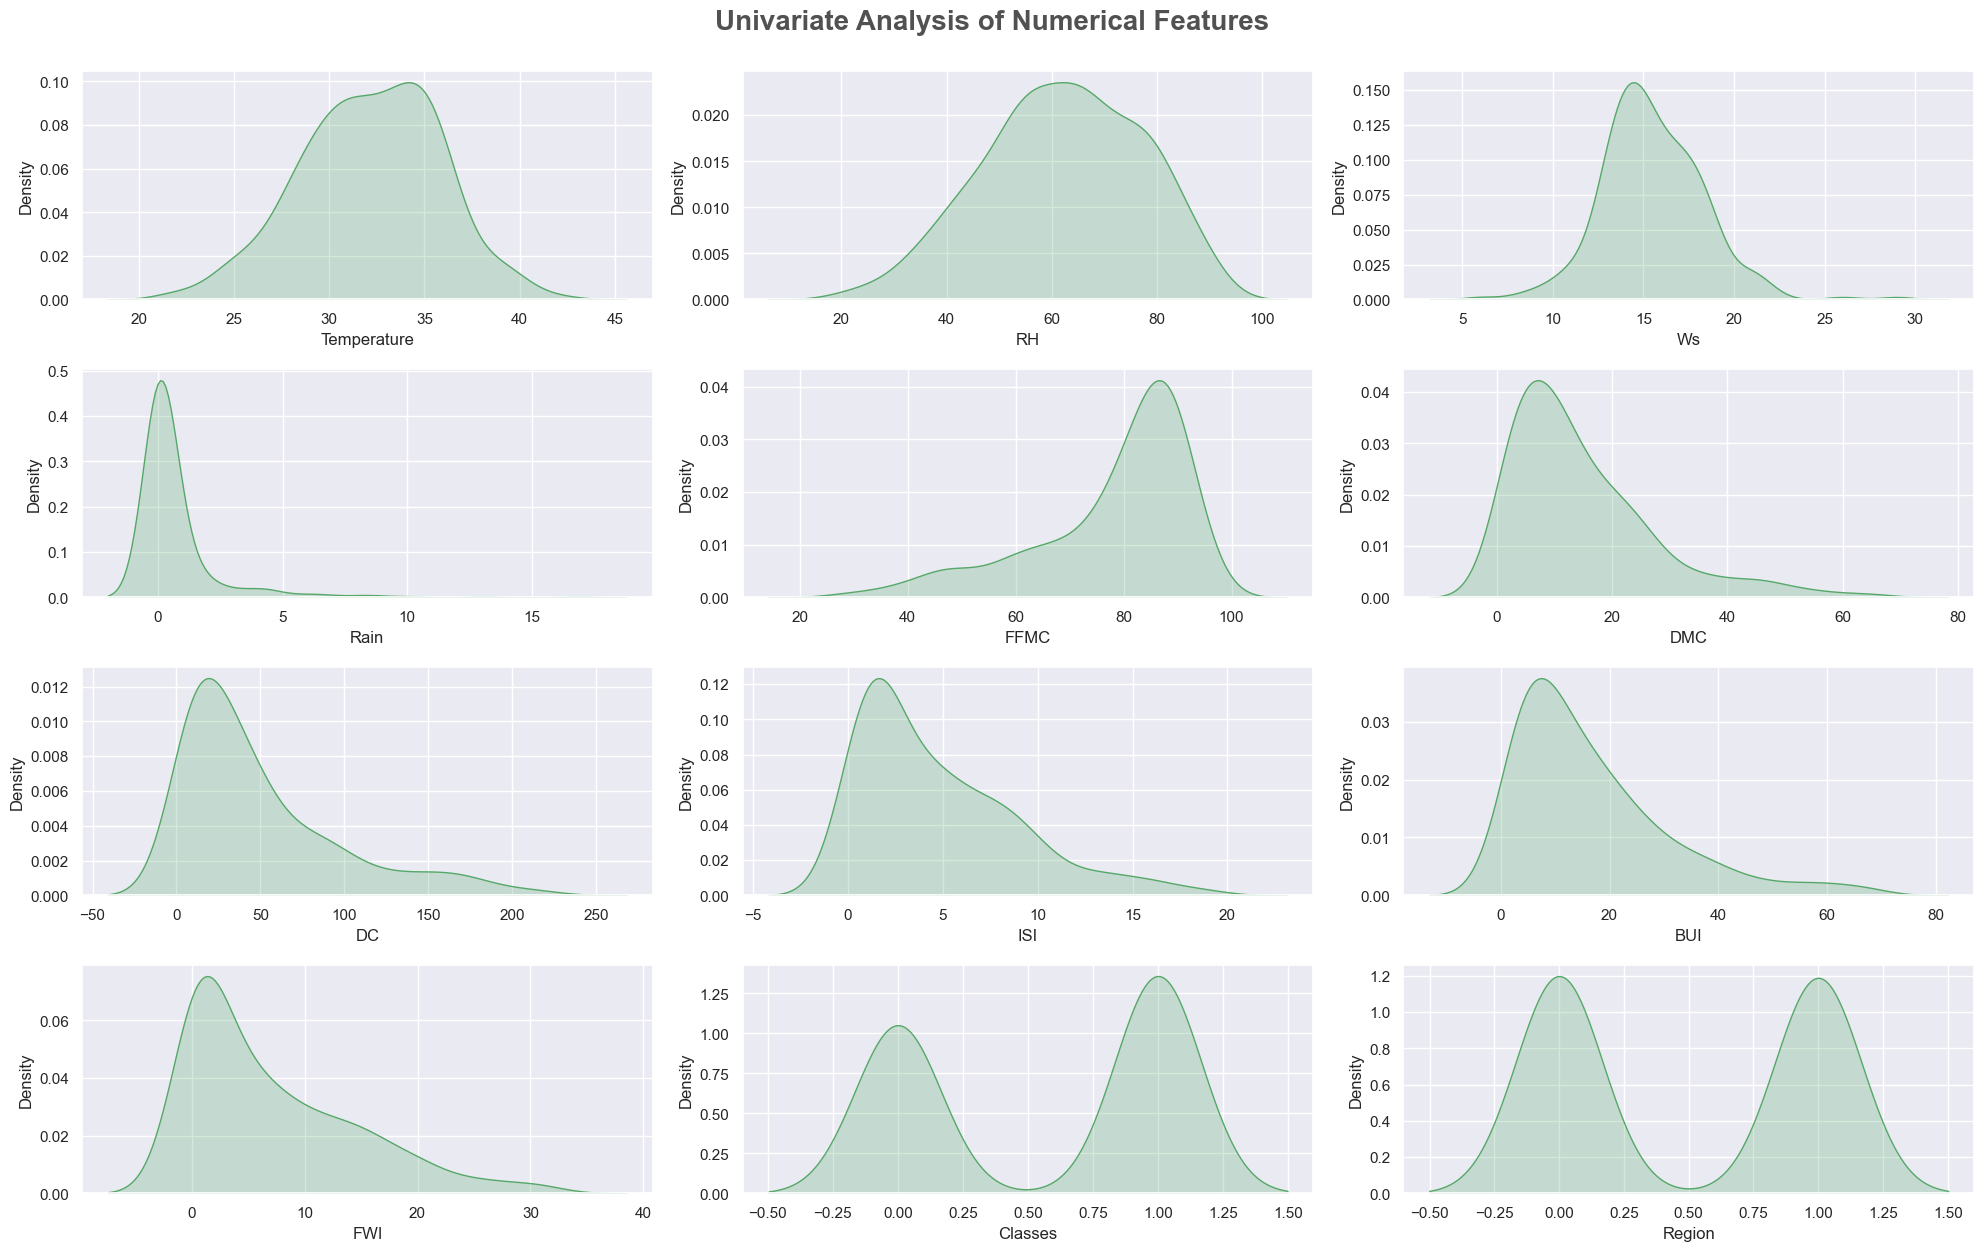

In [27]:
plt.figure(figsize=(20,15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold',alpha=0.8,y=1.)

for i in range(0,len(df_copy.columns)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df_copy[df_copy.columns[i]],shade=True,color='g')
    plt.xlabel(df_copy.columns[i])
    plt.tight_layout()


In [28]:
# Percentage
percentage = df_copy['Classes'].value_counts(normalize=True)*100
percentage

Classes
1    56.378601
0    43.621399
Name: proportion, dtype: float64

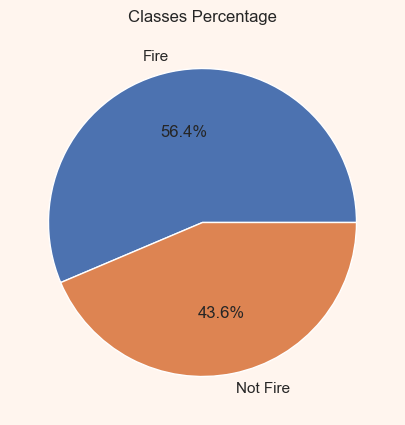

In [29]:
class_labels = ['Fire','Not Fire']
plt.figure(figsize=(8,5))
plt.gcf().set_facecolor('#FFF5EE')  # A shady gray color
plt.pie(percentage,labels=class_labels,autopct='%1.1f%%')
plt.title("Classes Percentage")
plt.show()

In [30]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

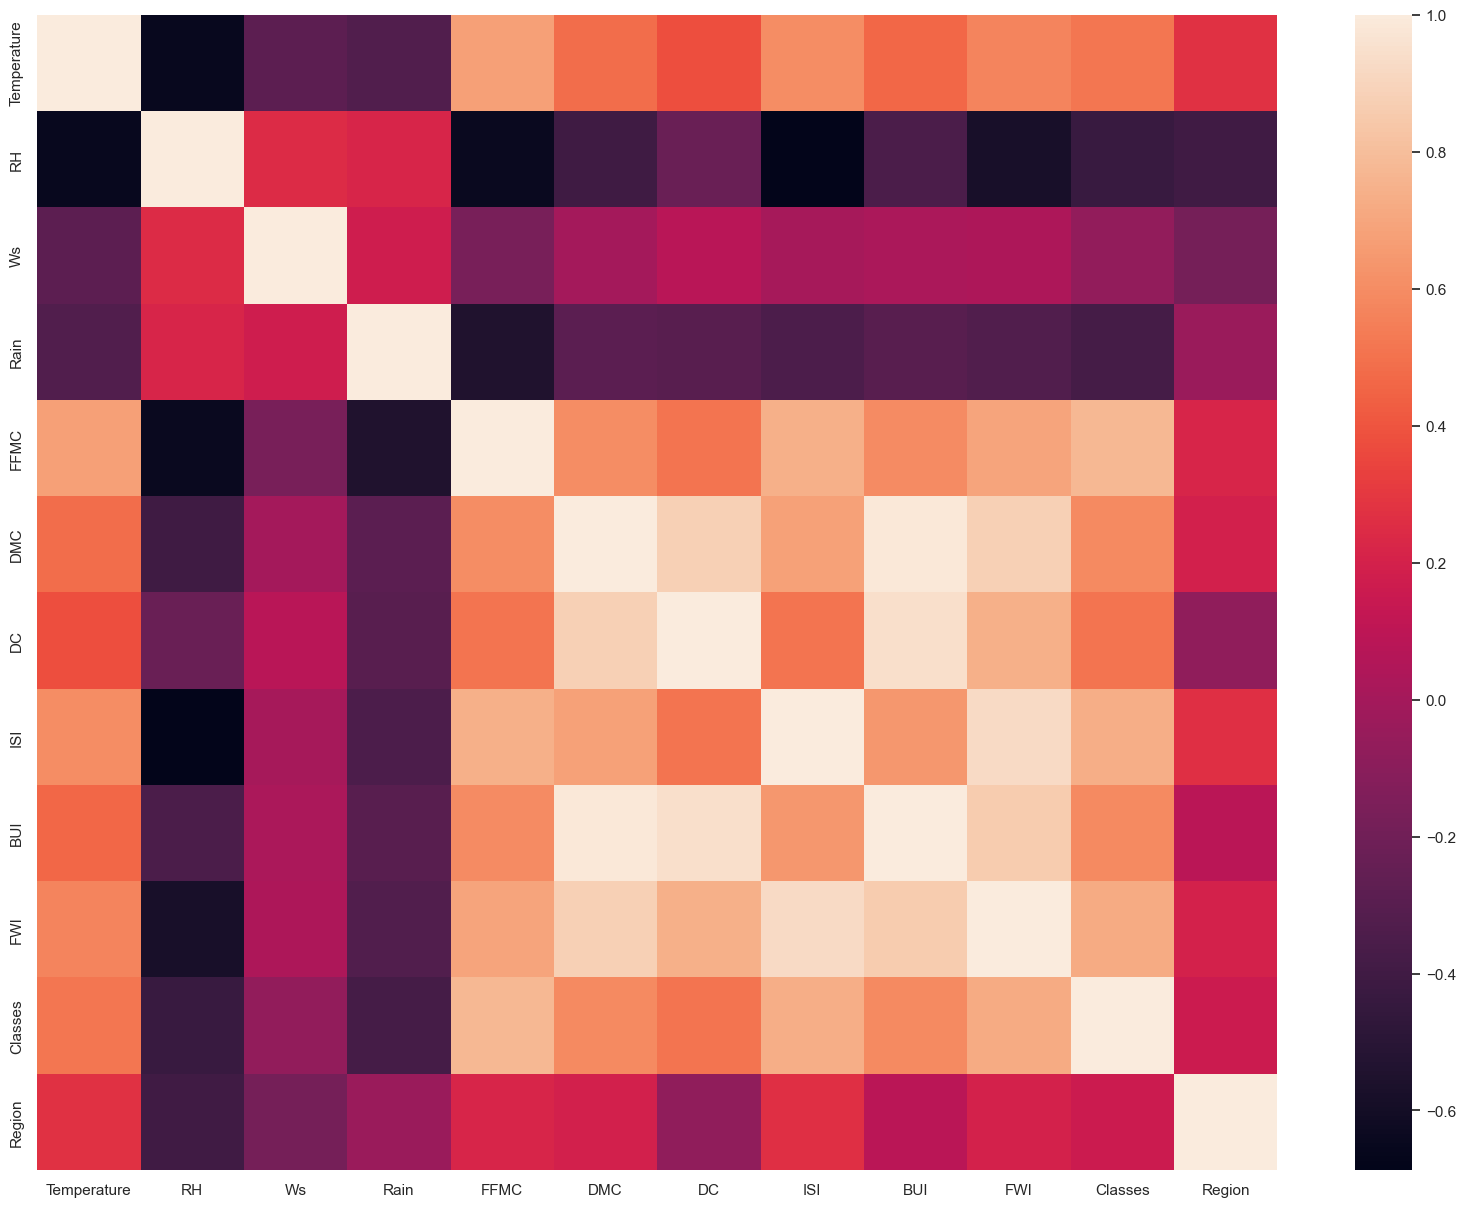

In [31]:
plt.figure(figsize=(20,15))
sns.heatmap(df_copy.corr())

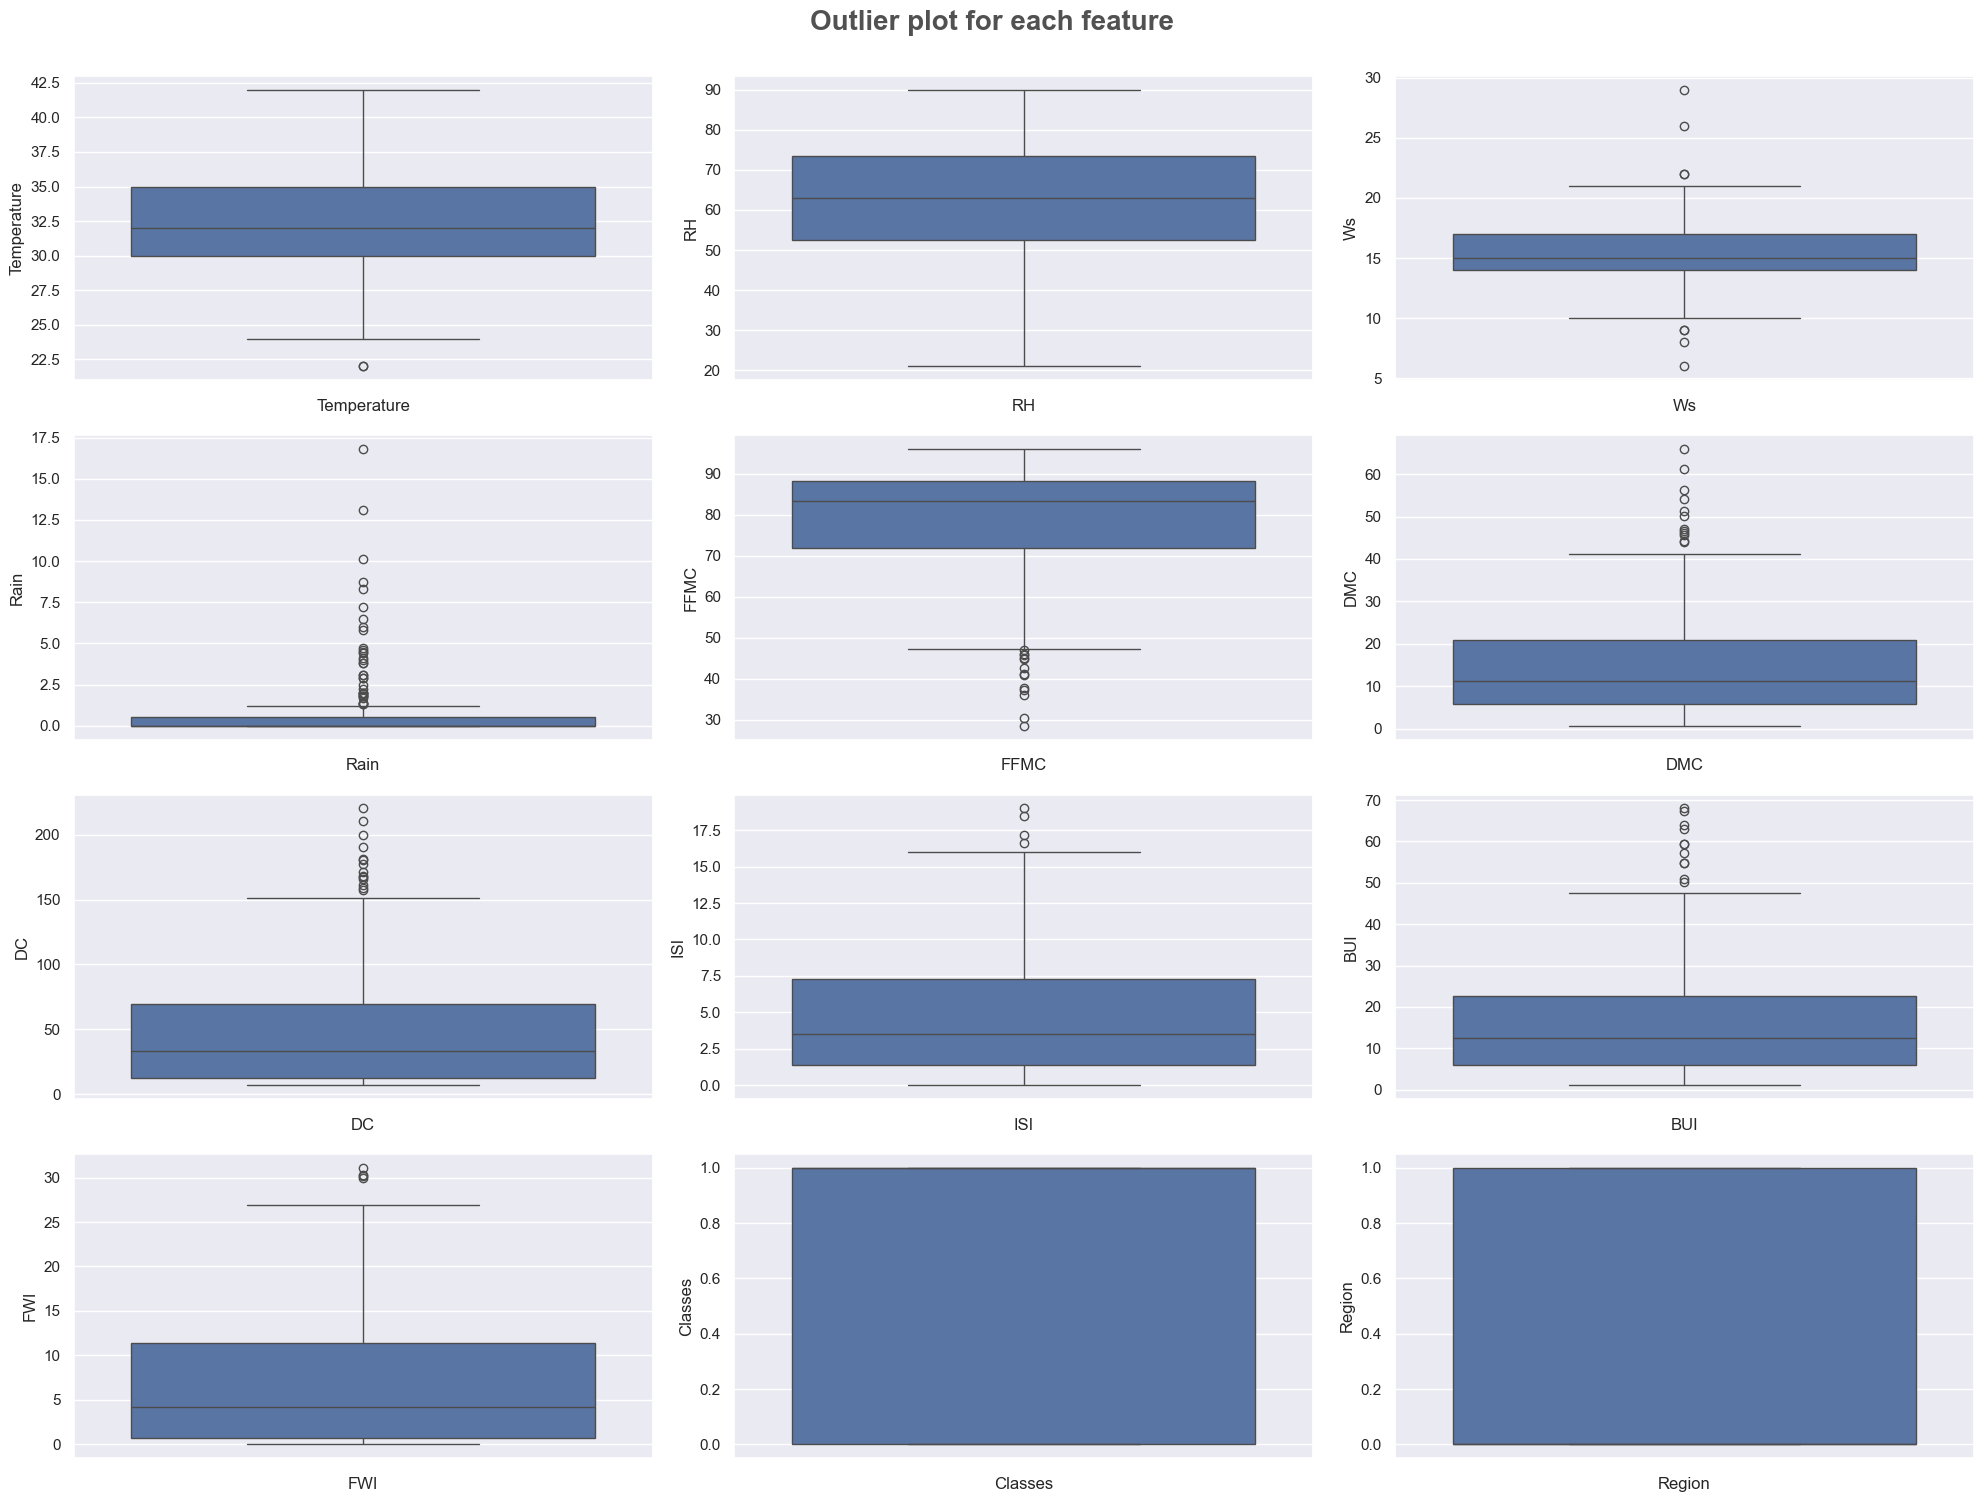

In [32]:
# to notice the outliers

plt.figure(figsize=(20,15))
plt.suptitle('Outlier plot for each feature',fontsize=20,fontweight='bold',alpha=0.8,y=1.)

for i,ele in enumerate(df_copy.columns):
    plt.subplot(4,3,i+1)
    sns.boxplot(df_copy[ele],fill=True,color='b')
    plt.xlabel(ele)
    plt.tight_layout()

# sns.boxplot(df_copy)

Text(0.5, 1.0, 'Fire Analysis of Bejaia Region')

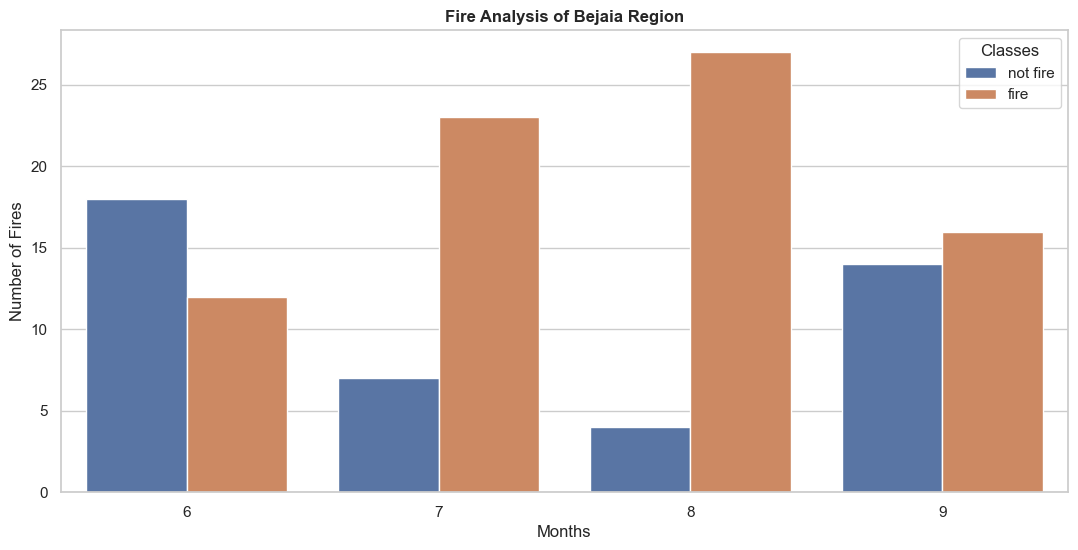

In [33]:
# Monthly Fire Analysis

df_temp = df.loc[df['Region'] == 1]
plt.figure(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df_temp) # hue categorizes the data based on Classes
plt.ylabel('Number of Fires')
plt.xlabel('Months')
plt.title('Fire Analysis of Bejaia Region',weight='bold')

Text(0.5, 1.0, 'Fire Analysis of Sidi-Bel Region')

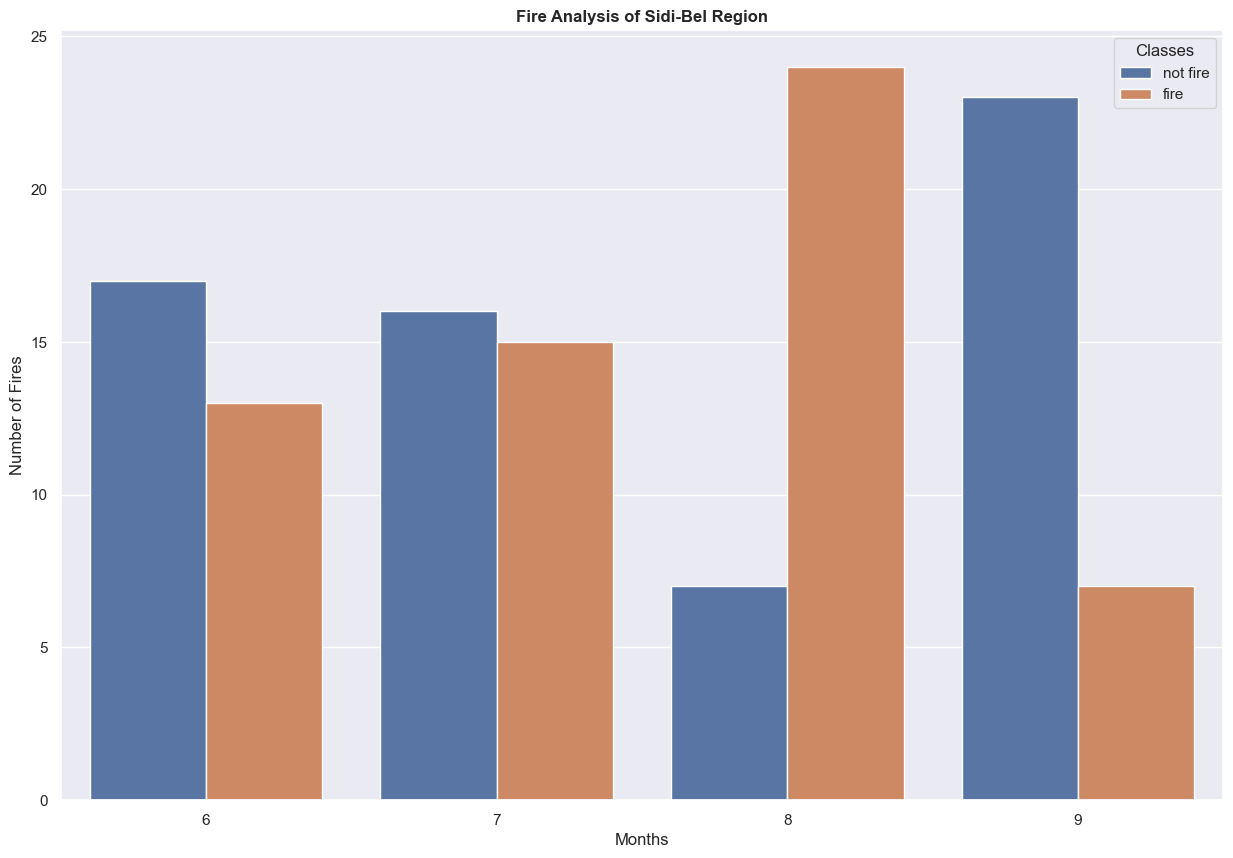

In [34]:
df_temp = df.loc[df['Region'] == 0]

plt.figure(figsize=(15,10))
sns.set_style('darkgrid')
sns.countplot(x='month',hue='Classes',data=df_temp)
plt.ylabel('Number of Fires')
plt.xlabel('Months')
plt.title('Fire Analysis of Sidi-Bel Region',weight='bold')

### Feature Selection to Predict FWI

In [35]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [36]:
df_new = df.drop(['day','month','year'],axis=1)
df_new['Classes'] = np.where(df_new['Classes'].str.contains('not fire'),0,1)
df_new.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [37]:
# Independent and dependent
X = df_new.drop('FWI',axis=1) 
y = df_new['FWI']

print(X[0:10])
print(y[0:10])

   Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  Classes  Region
0           29  57  18   0.0  65.7   3.4   7.6  1.3   3.4        0       0
1           29  61  13   1.3  64.4   4.1   7.6  1.0   3.9        0       0
2           26  82  22  13.1  47.1   2.5   7.1  0.3   2.7        0       0
3           25  89  13   2.5  28.6   1.3   6.9  0.0   1.7        0       0
4           27  77  16   0.0  64.8   3.0  14.2  1.2   3.9        0       0
5           31  67  14   0.0  82.6   5.8  22.2  3.1   7.0        1       0
6           33  54  13   0.0  88.2   9.9  30.5  6.4  10.9        1       0
7           30  73  15   0.0  86.6  12.1  38.3  5.6  13.5        1       0
8           25  88  13   0.2  52.9   7.9  38.8  0.4  10.5        0       0
9           28  79  12   0.0  73.2   9.5  46.3  1.3  12.6        0       0
0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
5    2.5
6    7.2
7    7.1
8    0.3
9    0.9
Name: FWI, dtype: float64


In [38]:
# Train Test Split
from sklearn.model_selection import train_test_split 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [39]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [40]:
# Feature Selection based on correlation

# Negatively Correlated can be important feature, but 
# Positively Correlated should be removed

X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'Classes', 'Region'],
      dtype='object')


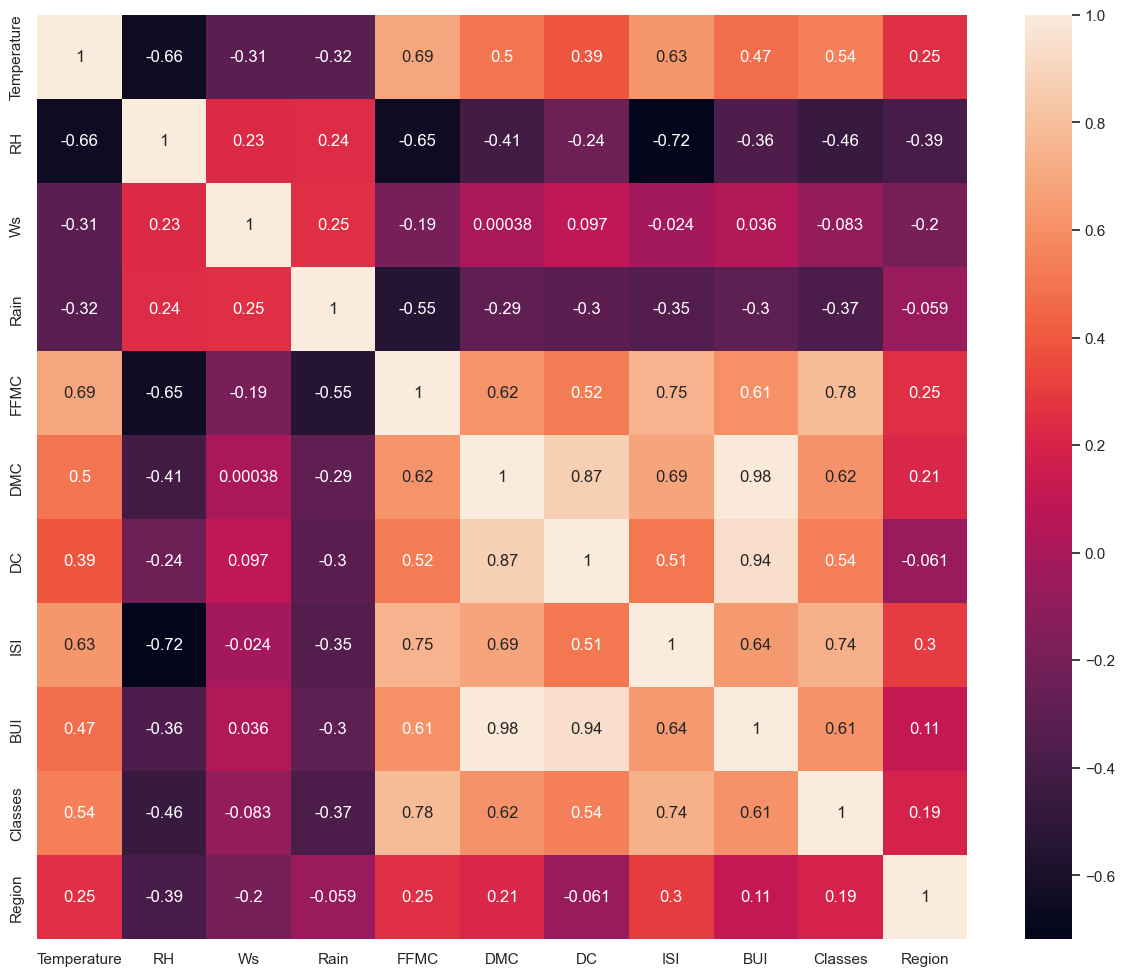

In [41]:
# check for multi-collinearity
plt.figure(figsize=(15,12))
corr = X_train.corr()
sns.heatmap(corr,annot=True)
print(corr.columns)

In [42]:
def correlation(dataset,threshold):
    n = len(dataset.columns)
    col_corr = set()
    corr_matrix = dataset.corr()

    for i in range(n):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])*100 > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
            

    return col_corr


In [43]:
## drop features when correlation is more than 0.85
corr_features = correlation(X_train,85)

X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [44]:
# Feature Scaling or Standardization 
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)


Text(0.5, 1.0, 'X_train After Scaling')

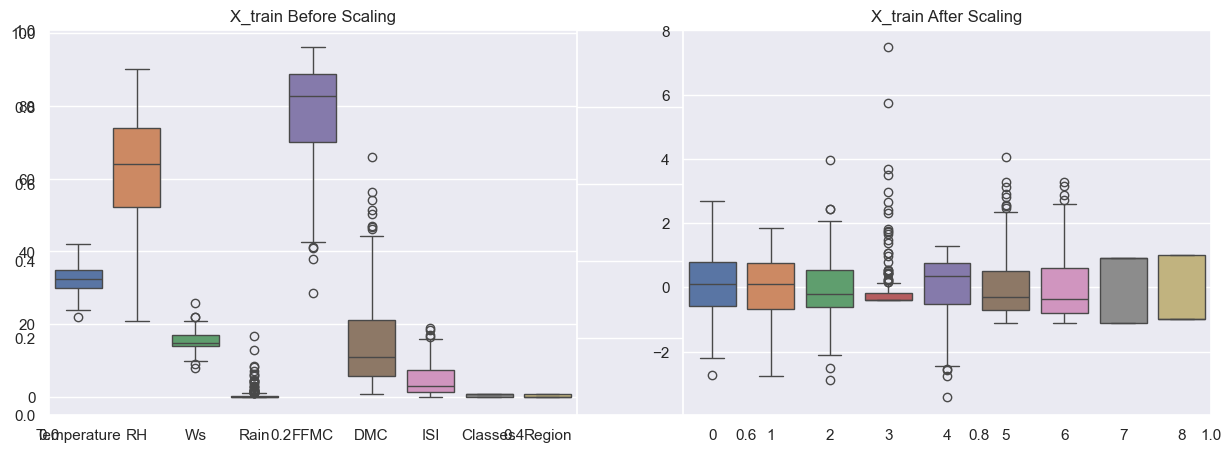

In [45]:
# Outliers Before and After Scaling

plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')

plt.subplot(1,2,2)
sns.boxplot(data=X_train_sc)
plt.title('X_train After Scaling')


### Linear Regression Model

In [46]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error

reg = LinearRegression()

reg.fit(X_train_sc,y_train)
y_pred_train = reg.predict(X_train_sc)


In [47]:
mae = mean_absolute_error(y_pred_train,y_train)
print(mae)

0.7438000223762672


In [48]:
from sklearn.metrics import r2_score 

score = r2_score(y_pred_train,y_train)
print(score)

0.9689741284990734


In [49]:
(X_train.shape,y_pred_train.shape)

((182, 9), (182,))

Text(0, 0.5, 'y trained predicted output')

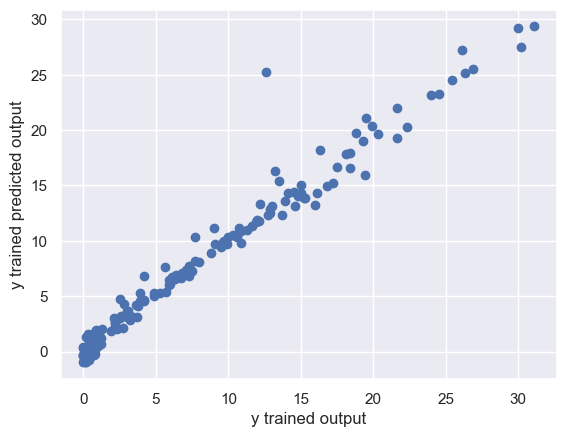

In [50]:
# plot the prediction

plt.scatter(y_train,y_pred_train)
plt.xlabel('y trained output')
plt.ylabel('y trained predicted output')

# so our model prediction has good fit

R Square:  0.9847657384266952


Text(0, 0.5, 'y test predicted output')

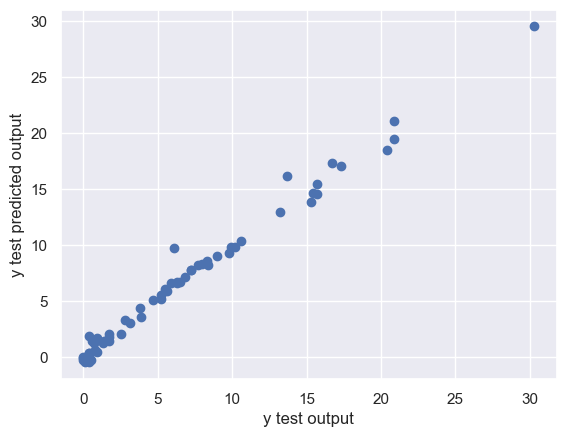

In [51]:
y_pred_test = reg.predict(X_test_sc)
print("R Square: ",r2_score(y_test,y_pred_test))

plt.scatter(y_test,y_pred_test)
plt.xlabel('y test output')
plt.ylabel('y test predicted output')

### Lasso Regression:

To improve feature selection for the model

In [52]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train_sc,y_train)
y_pred_train_l = lasso.predict(X_train_sc)

score_train_l = r2_score(y_train,y_pred_train_l)
print(score_train_l)

0.944123811826199


In [53]:
y_pred_test_l = lasso.predict(X_test_sc)

score_test_l = r2_score(y_test,y_pred_test_l)
print(score_test_l)

0.9492020263112388


What Happens During LassoCV with cv=5:
1) Data Split for Cross-Validation:
   The training data is split into 5 folds (subsets).
   In each experiment, 4 folds are used for training, and the remaining 1 fold is used for validation.
   This process is repeated 5 times, with each fold acting as the validation set exactly once.

2) Testing Different Alpha Values:
   Ridge regression introduces an alpha parameter (regularization strength) to control the magnitude of the coefficients.
   During the cross-validation process, LassoCV tests a range of candidate alpha values provided (or defaults to a predefined set if not provided).

3) Evaluating Performance:
   For each alpha value, LassoCV trains the model on the 4 training folds and evaluates its performance (e.g., mean squared error or R-squared) on the 1 validation fold.
   This is repeated for all 5 folds, and the average performance for each alpha is computed.

4) Choosing the Best Alpha:
   The alpha that gives the best average performance across the 5 validation sets is selected as the optimal regularization parameter.
   The model is then retrained on the entire training dataset using this optimal alpha.

### Cross Validation Lasso

In [54]:
from sklearn.linear_model import LassoCV 

lassocv = LassoCV(cv=5)
# alpha is the amount of penalization choosen by cross validation 
lassocv.fit(X_train_sc,y_train)

y_pred_train_lcv = lassocv.predict(X_train_sc)
print("R square: ",r2_score(y_train,y_pred_train_lcv))

R square:  0.9689655854295935


In [55]:
# what alpha was created (the penalization coefficient)
lassocv.alpha_

0.05725391318234411

In [56]:
lassocv.mse_path_.shape # for each cv 100s of alphas are calculated


(100, 5)

### Ridge Regression Model:

to reduce overfitting 

In [57]:
from sklearn.linear_model import Ridge 

ridge = Ridge()

ridge.fit(X_train_sc,y_train) 
y_pred_train_r = ridge.predict(X_train_sc)

print("R Square: ",r2_score(y_train,y_pred_train_r))

R Square:  0.9698587766663882


In [58]:
y_pred_test_r = ridge.predict(X_test_sc)
print("R square:",r2_score(y_test,y_pred_test_r))

R square: 0.9842993364555513


### Ridge CV model


In [59]:
from sklearn.linear_model import RidgeCV 

ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_sc,y_train) 
y_pred_train_rcv = ridgecv.predict(X_train_sc)
y_pred_test_rcv = ridgecv.predict(X_test_sc)

print("R Square on train: ",r2_score(y_train,y_pred_train_rcv))
print("R square on test: ",r2_score(y_test,y_pred_test_rcv))

R Square on train:  0.9698587766663882
R square on test:  0.9842993364555513


### Elastic Net Regression

combination of both Lasso & Ridge

In [60]:
from sklearn.linear_model import ElasticNet 

elastic = ElasticNet()

elastic.fit(X_train_sc,y_train) 
y_pred_train_el = elastic.predict(X_train_sc)

print("R Square: ",r2_score(y_train,y_pred_train_el))

R Square:  0.8886062760838327


In [61]:
y_pred_test_el = elastic.predict(X_test_sc)

print("R square: ",r2_score(y_test,y_pred_test_el))

R square:  0.8753460589519703


### ElasticNetCV



In [62]:
from sklearn.linear_model import ElasticNetCV 

elasticNetCV = ElasticNetCV(cv=5)
elasticNetCV.fit(X_train_sc,y_train) 
y_pred_train_ecv = elasticNetCV.predict(X_train_sc)
y_pred_test_ecv = elasticNetCV.predict(X_test_sc)

print("R Square on train: ",r2_score(y_train,y_pred_train_ecv))
print("R square on test: ",r2_score(y_test,y_pred_test_ecv))


R Square on train:  0.9688828442730821
R square on test:  0.9814217587854941


So we notice with cross validation our model improves, by reducing overfitting.

We will use the ElasticNetCV Model for Model Pickling 

In [63]:
scaler

StandardScaler()

In [64]:
elasticNetCV

ElasticNetCV(cv=5)

In [66]:
import pickle

pickle.dump(scaler,open('scaler.pkl','wb'))  # write byte mode 
pickle.dump(elasticNetCV,open('elasticNetCV.pkl','wb'))